<a href="https://colab.research.google.com/github/farrukh61/Classification-Semester-Assignment/blob/main/Assignment2_Income_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Income_Dataset.csv')

In [ ]:
df.head()

,Age,Work-Class,Final_Weight,Education,Educational_Years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,>100K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(250, 15)

## Exploratoty Data Analysis

### Missing Values

In [ ]:
df.isnull().sum()

Age                   0
Work-Class           13
Final_Weight          0
Education             0
Educational_Years     0
Marital_Status        0
Occupation           10
Relationship          0
Race                  0
Gender                0
Capital_Gain          0
Capital_Loss          0
Hours_Per_Week        0
Native_Country        3
Income                0
dtype: int64

In [ ]:
# list of feature with NaN values
features_with_na = [features for features in df if df[features].isnull().any()==True]
features_with_na

['Work-Class', 'Occupation', 'Native_Country']

In [ ]:
# percentage of missing data in columns of income data set
for features in features_with_na:
    print(features, np.round(df[features].isnull().mean(),4)*100,'% missing values')

Work-Class 5.2 % missing values
Occupation 4.0 % missing values
Native_Country 1.2 % missing values


<AxesSubplot:>

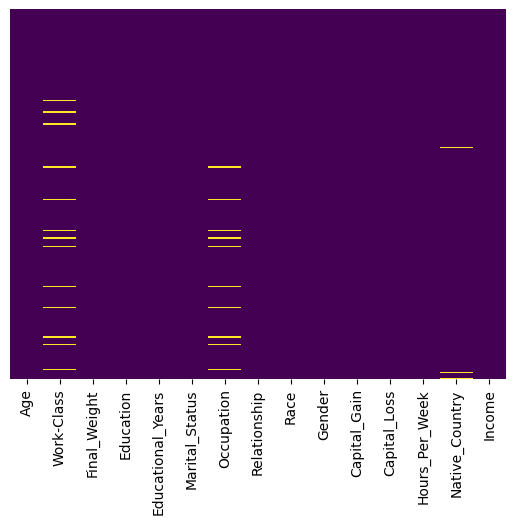

In [ ]:
# using seaborn's heatmap to visualize nan values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

### Value Counts

<AxesSubplot:xlabel='Income', ylabel='count'>

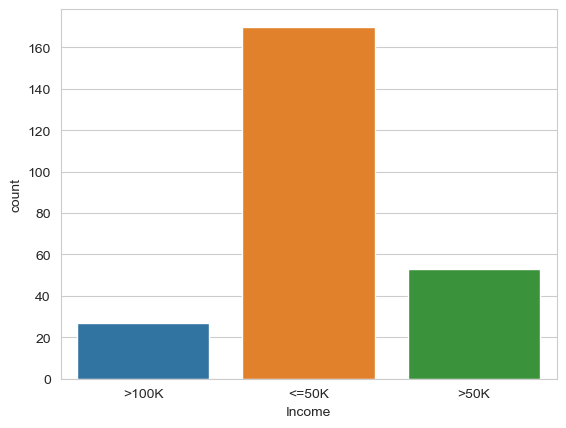

In [ ]:
# count of income classes
sns.set_style('whitegrid')
sns.countplot(x='Income',data=df)

We can see most of the people in data set have income less than or equal to 50 thousands

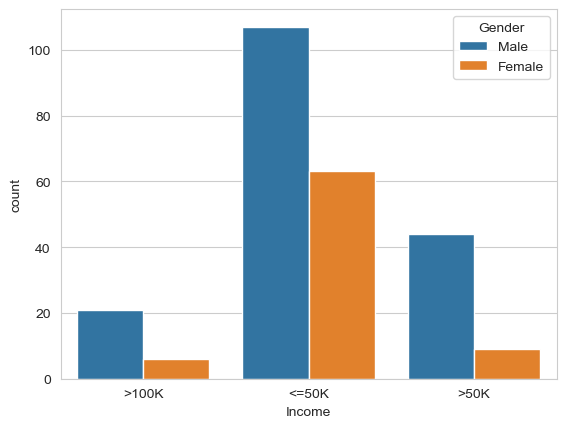

In [ ]:
# count of income based on gender
sns.set_style('whitegrid')
sns.countplot(x = 'Income', hue = 'Gender',data=df);

## Data Cleaning

In [ ]:
df.head()

,Age,Work-Class,Final_Weight,Education,Educational_Years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,>100K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.isnull().any()

Age                  False
Work-Class            True
Final_Weight         False
Education            False
Educational_Years    False
Marital_Status       False
Occupation            True
Relationship         False
Race                 False
Gender               False
Capital_Gain         False
Capital_Loss         False
Hours_Per_Week       False
Native_Country        True
Income               False
dtype: bool

Since the only cateogorical data contain missing values, it is better to replace missing values with the most frequent value happeing in the column

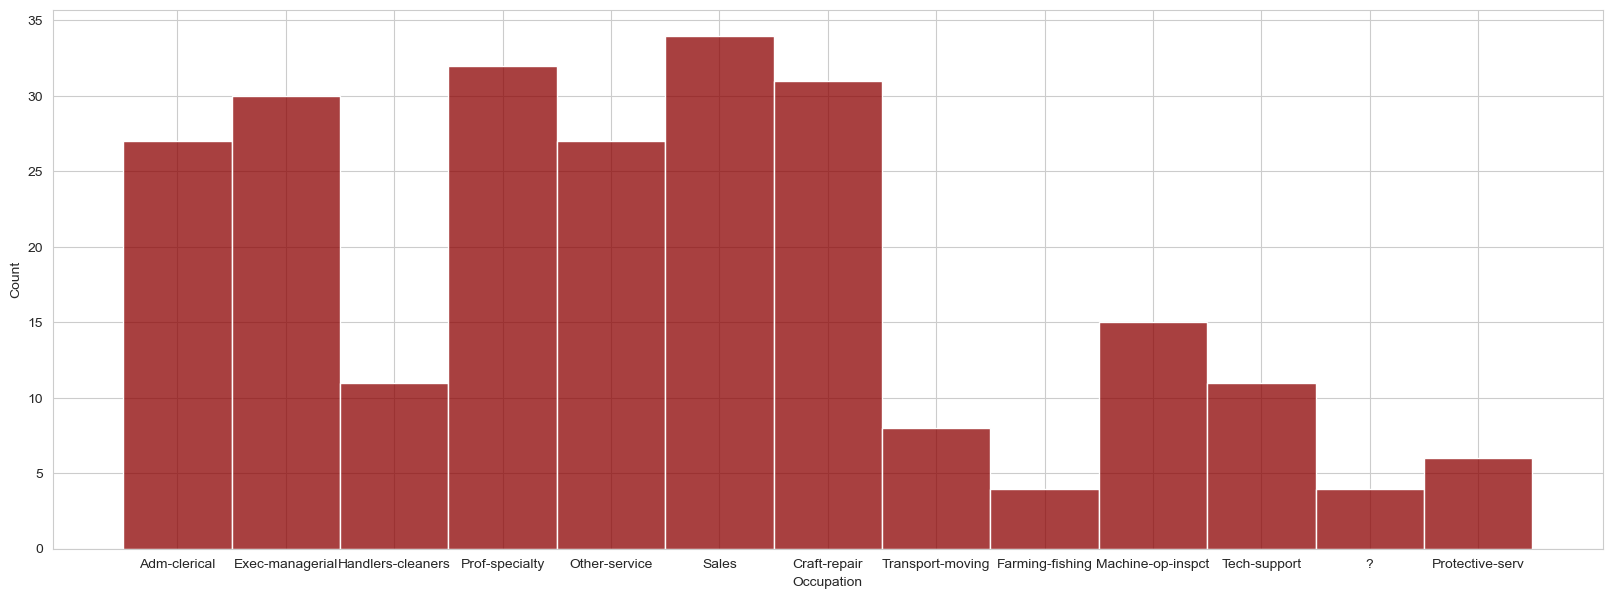

In [ ]:
# Occupation Histogram
plt.figure(figsize=(20,7))
sns.histplot(df.Occupation,kde=False,color='darkred');


'Sales' occupation appers to be frequent in the data set


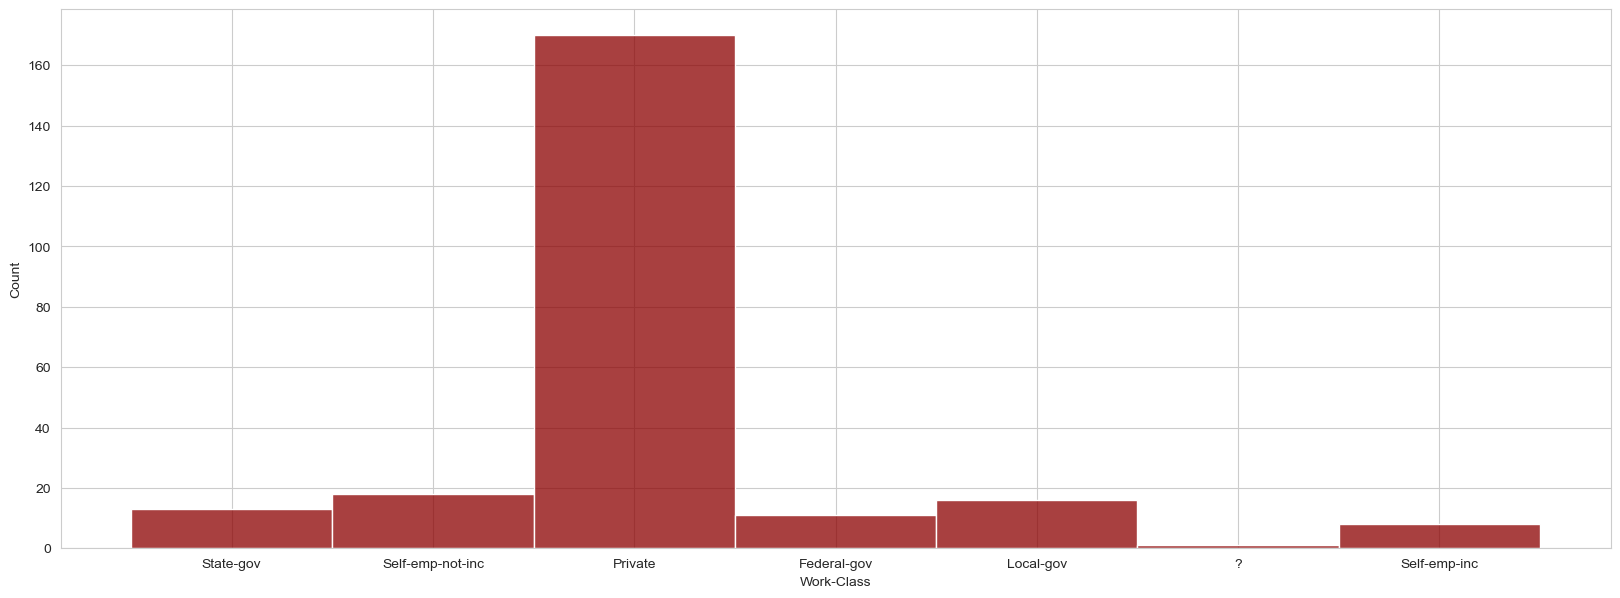

In [ ]:
# Work-Class Histogram
plt.figure(figsize=(20,7))
sns.histplot(df['Work-Class'],kde=False,color='darkred');

'Private' work-class appers to be frequent in the data set

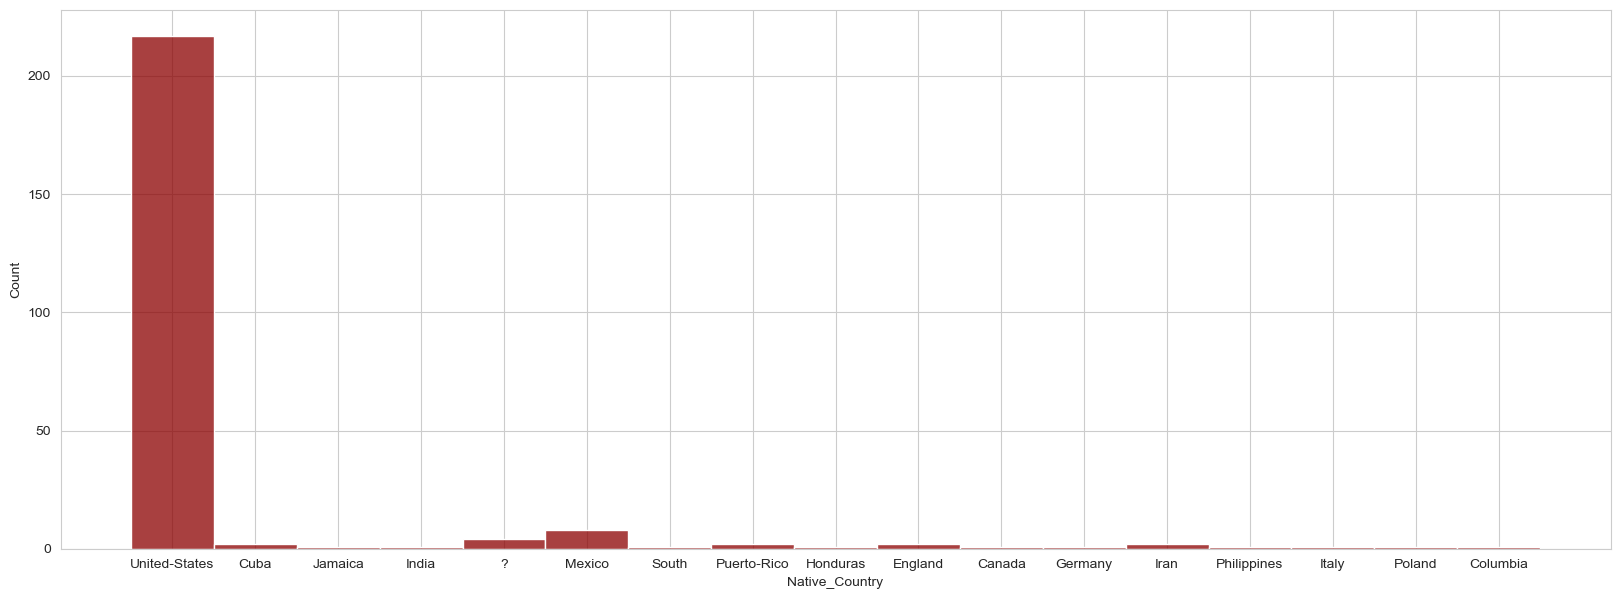

In [ ]:
#Native_Country Histogram
plt.figure(figsize=(20,7))
sns.histplot(df['Native_Country'],kde=False,color='darkred');

'United States' native country appers to be frequent in the data set

#### Replacing missing values with the frequent values

In [ ]:
df1 = df.copy()

for col in df1.columns:
    if df1[col].isnull().sum()>0:
        most_frequent_value = df1[col].mode()[0]
        df1[col].fillna(most_frequent_value,inplace = True)

In [ ]:
df1.head()

,Age,Work-Class,Final_Weight,Education,Educational_Years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,>100K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df1.isnull().any()

Age                  False
Work-Class           False
Final_Weight         False
Education            False
Educational_Years    False
Marital_Status       False
Occupation           False
Relationship         False
Race                 False
Gender               False
Capital_Gain         False
Capital_Loss         False
Hours_Per_Week       False
Native_Country       False
Income               False
dtype: bool

<AxesSubplot:>

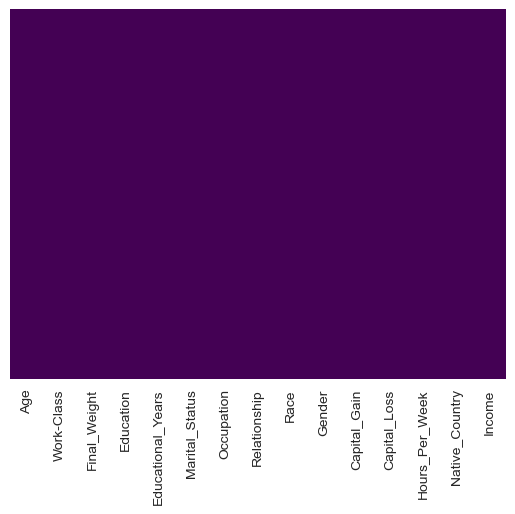

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False, cbar=False,cmap='viridis')

Finally we have obtained a dataset df1 with no missing values

### Droping some irralevant features

In [ ]:
df1.head()

,Age,Work-Class,Final_Weight,Education,Educational_Years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,>100K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Most commonly Marital status, Race and Relationship do not effect the Income of the person. wo we right now drop the Race and Marital status columns

In [ ]:
df2 = df1.drop(['Race','Marital_Status'],axis=1)

In [ ]:
df2.head()

,Age,Work-Class,Final_Weight,Education,Educational_Years,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,>100K
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [ ]:
df2.shape

(250, 13)

## Converting Categorical Data to Numerical

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                250 non-null    int64 
 1   Work-Class         250 non-null    object
 2   Final_Weight       250 non-null    int64 
 3   Education          250 non-null    object
 4   Educational_Years  250 non-null    int64 
 5   Occupation         250 non-null    object
 6   Relationship       250 non-null    object
 7   Gender             250 non-null    object
 8   Capital_Gain       250 non-null    int64 
 9   Capital_Loss       250 non-null    int64 
 10  Hours_Per_Week     250 non-null    int64 
 11  Native_Country     250 non-null    object
 12  Income             250 non-null    object
dtypes: int64(6), object(7)
memory usage: 25.5+ KB


In [ ]:
# df3=df2.copy()
# first split the data into features and labels


df3 = df2.drop('Income',axis=1)
labels = df2['Income']


In [ ]:
# cateogrical data to numerical
features = df3.copy()
for col in features.columns:
    if features[col].dtype=='object':
         dummy_cols = pd.get_dummies(features[col],drop_first=True)
         features = pd.concat([features,dummy_cols],axis=1)
         features.drop(col,axis = 1, inplace = True)

In [ ]:
features

,Age,Final_Weight,Educational_Years,Capital_Gain,Capital_Loss,Hours_Per_Week,Federal-gov,Local-gov,Private,Self-emp-inc,...,India,Iran,Italy,Jamaica,Mexico,Philippines,Poland,Puerto-Rico,South,United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,56,203580,9,0,0,35,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
246,58,236596,9,0,0,45,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
247,32,183916,9,0,0,34,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
248,40,207578,12,0,1977,60,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
features.describe()

,Age,Final_Weight,Educational_Years,Capital_Gain,Capital_Loss,Hours_Per_Week,Federal-gov,Local-gov,Private,Self-emp-inc,...,India,Iran,Italy,Jamaica,Mexico,Philippines,Poland,Puerto-Rico,South,United-States
count,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,38.676000,191643.140000,10.180000,628.97600,131.404000,40.260000,0.044000,0.064000,0.732000,0.032000,...,0.004000,0.008000,0.004000,0.004000,0.032000,0.004000,0.004000,0.008000,0.004000,0.880000
std,13.459557,109785.349277,2.675863,3102.53252,476.800457,11.245722,0.205507,0.245244,0.443806,0.176353,...,0.063246,0.089263,0.063246,0.063246,0.176353,0.063246,0.063246,0.089263,0.063246,0.325613
min,17.000000,24215.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,115489.750000,9.000000,0.00000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.500000,180174.500000,10.000000,0.00000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,47.000000,248944.750000,13.000000,0.00000,0.000000,42.750000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,635913.000000,16.000000,34095.00000,2206.000000,80.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
features.isnull().any(axis=1).sum()

0

In [ ]:
features.to_csv('income_feature.csv', index=False)
labels.to_csv('income_label.csv', index=False)

## Defining the necessary functions

In [ ]:
import pandas as pd
import numpy as np
# Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Cost function for binary logistic regression
def cost(X,y,wt):
    m = len(y)
    hyp = sigmoid(X.dot(wt))
    J = (-1/m)* (y.dot(np.log(hyp))+(1-y).dot(np.log(1-hyp)))  # without regularization
    return J
# Gradient descent function for binary classification
def gradient_descent(X,y,wt,alpha,iteration,tolerance):
    m = len(y)
    cost_history = np.zeros(iteration)
    for i in range(iteration):
        hyp = sigmoid(X.dot(wt))
        wt_new = wt -(alpha/m)* X.T.dot(hyp-y)
        cost_history[i] = cost(X,y,wt_new)
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
            print(f"Converged at iteration {i}")
            break
            
        wt = wt_new   # this is what we need for a well trained model 
    return wt, cost_history
# prediction function
def predict_binary(X, weights):
    """
    Predict binary class labels for given input and weight matrices.

    Parameters:
    -----------
    X : numpy array
        Input data matrix of shape (m, n), where m is the number of samples and
        n is the number of features.
    weights : numpy array
        Weight matrix of shape (1, n+1), where n is the number of features. The
        first element of each row corresponds to the bias term.

    Returns:
    --------
    y_pred : numpy array
        Predicted binary class labels for given input matrix X and weight matrix
        weights. Output has shape (m,).
    """


    # Calculate predicted values
    y_pred = 1 / (1 + np.exp(-X.dot(weights.T)))

    # Apply threshold of 0.5 to predicted values
    y_pred = np.where(y_pred > 0.5, 1, 0)

    return y_pred

# accuracy score
def accuracy_score(y_true, y_pred):
    """
    Computes the accuracy score for multi-class classification with three classes.
    
    Parameters:
        y_true (numpy.ndarray): Ground truth labels, shape (n_samples,)
        y_pred (numpy.ndarray): Predicted labels, shape (n_samples,)
        
    Returns:
        float: The accuracy score
    """
    n_correct = np.sum(y_true == y_pred)
    accuracy = n_correct / len(y_true)
    return accuracy

### Setting the data

In [ ]:
fea = pd.read_csv('income_feature.csv')
label = pd.read_csv('income_label.csv')
dummy_cols = pd.get_dummies(label)
income_less_50=dummy_cols['Income_<=50K']
income_bw_50_100 = dummy_cols['Income_>50K']
income_abv_100  = dummy_cols['Income_>100K']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
fea_trans=scaler.fit_transform(fea)
## Spliting intot test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train0,y_test0,y_train1,y_test1,y_train2,y_test2 = train_test_split(fea_trans,income_less_50,income_bw_50_100,income_abv_100,test_size=0.2, random_state=400)  # y_train0, y_test0 replresent the data fro class <50k only
# adding a column of ones in features matrix for the bias term

x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))
x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))

Converged at iteration 4543
Converged at iteration 2789
Converged at iteration 3117


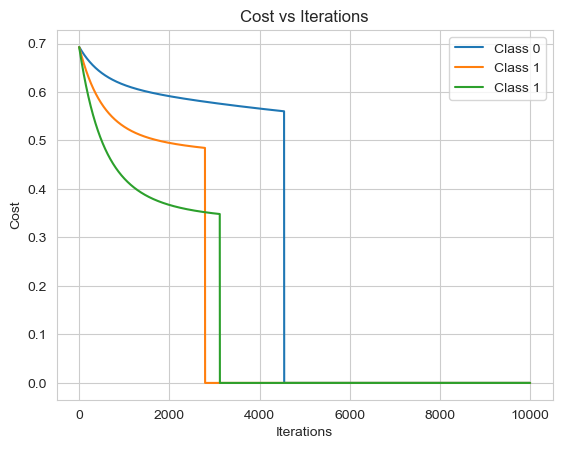

In [ ]:
import matplotlib.pyplot as plt


## Initiall values

# initializing the weight parameters for each class
wt0 = np.ones(x_train.shape[1])*0
wt1 = np.ones(x_train.shape[1])*0
wt2 = np.ones(x_train.shape[1])*0

# learning rate
alpha = 0.001
iteration = 10000
tol = 1e-5   ## if we set tol 1e-6, only one class achieves convergence at 30000 iterations.computation time also increases
# Run the gradient descent to train each model
cost_history = [None]*3
wt0, cost_history[0] = gradient_descent(x_train, y_train0, wt0, alpha, iteration,tol)
wt1, cost_history[1] = gradient_descent(x_train, y_train1, wt1, alpha, iteration,tol)
wt2, cost_history[2] = gradient_descent(x_train, y_train2, wt2, alpha, iteration,tol)


# Plot cost_history for class 0 
plt.plot(cost_history[0], label='Class 0')

# Plot cost_history for class 1 
plt.plot(cost_history[1], label='Class 1')

# Plot cost_history for class 2 
plt.plot(cost_history[2], label='Class 1')

# Add a title and labels for the x and y axes
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Add a legend to identify which curve corresponds to which class
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Accuracy check check
from sklearn.metrics import classification_report

def fit_check(X, y_true, wt):
    y_pred = np.round(sigmoid(X.dot(wt)))
    print(classification_report(y_true, y_pred))
import warnings
warnings.filterwarnings('ignore')
print('Class 0:')
print('Accuracy on train data:')
fit_check(x_train, y_train0, wt0)
print('\nAccuracy on test data:')
fit_check(x_test, y_test0, wt0)
print('Class 1:')
print('Accuracy on train data:')
fit_check(x_train, y_train1, wt1)
print('\nAccuracy on test data:')
fit_check(x_test, y_test1, wt1)
print('Class 2:')
print('Accuracy on train data:')
fit_check(x_train, y_train2, wt2)
print('\nAccuracy on test data:')
fit_check(x_test, y_test2, wt2)

Class 0:
Accuracy on train data:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        62
           1       0.70      1.00      0.82       138

    accuracy                           0.70       200
   macro avg       0.85      0.52      0.44       200
weighted avg       0.79      0.70      0.59       200


Accuracy on test data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.64      1.00      0.78        32

    accuracy                           0.64        50
   macro avg       0.32      0.50      0.39        50
weighted avg       0.41      0.64      0.50        50

Class 1:
Accuracy on train data:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       161
           1       0.00      0.00      0.00        39

    accuracy                           0.81       200
   macro avg       0.40      0.50     

In [ ]:
# pridictions on train data
y_hat0_train = sigmoid(x_train.dot(wt0))
y_hat1_train = sigmoid(x_train.dot(wt1))
y_hat2_train = sigmoid(x_train.dot(wt2))


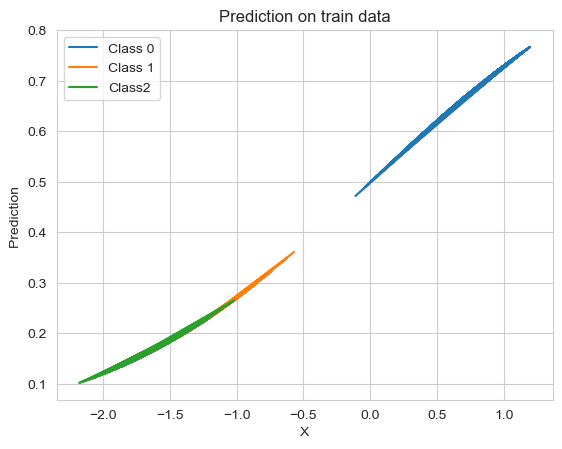

In [ ]:
# Activation Function Plots
 
plt.plot(x_train.dot(wt0),y_hat0_train, label='Class 0')


plt.plot(x_train.dot(wt1),y_hat1_train, label='Class 1')


plt.plot(x_train.dot(wt2),y_hat2_train, label='Class2')

# Add a title and labels for the x and y axes
plt.title('Prediction on train data')
plt.xlabel('')
plt.ylabel('Prediction ')

plt.legend()

plt.show()

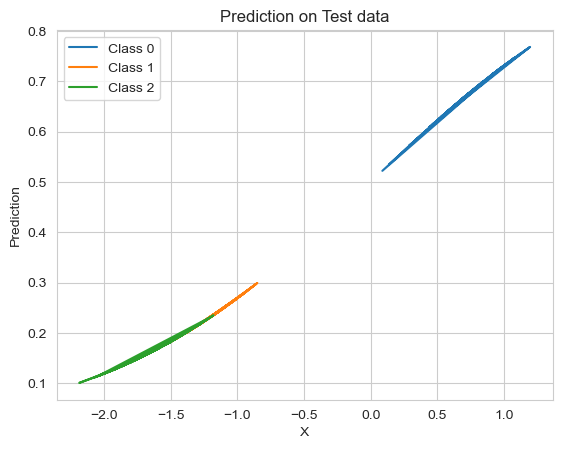

In [ ]:
# Predict on test data
y_hat0_test = sigmoid(x_test.dot(wt0))
y_hat1_test = sigmoid(x_test.dot(wt1))
y_hat2_test = sigmoid(x_test.dot(wt2))

# Activation Function Plots
 
plt.plot(x_test.dot(wt0),y_hat0_test, label='Class 0')


plt.plot(x_test.dot(wt1),y_hat1_test, label='Class 1')


plt.plot(x_test.dot(wt2),y_hat2_test, label='Class 2')

# Add a title and labels for the x and y axes
plt.title('Prediction on Test data')
plt.xlabel('X')
plt.ylabel('Prediction')

plt.legend()

plt.show()

In [ ]:
# Get the predicted class label for each example
example = x_test[5]  # replace with the example you want to predict
probabilities = np.array([sigmoid(example.dot(wt0)), sigmoid(example.dot(wt1)), sigmoid(example.dot(wt2))])
predicted_class = np.argmax(probabilities)

print("Probabilities:", probabilities)
print("Predicted class:", predicted_class)


Probabilities: [0.49107435 0.26932311 0.1738967 ]
Predicted class: 0


## Regularization

In [ ]:
# Cost function for binary logistic regression with L2 regularization
def cost_r(X,y,wt,Lambda):
    m = len(y)
    hyp = sigmoid(X.dot(wt))
    J = (-1/m)* (y.dot(np.log(hyp))+(1-y).dot(np.log(1-hyp))) + (Lambda/(2*m)) * np.sum(wt[1:]**2)
    return J

# Gradient descent function for binary classification with L2 regularization
def gradient_descent_r(X,y,wt_r,alpha,iteration,tolerance,Lambda):
    m = len(y)
    cost_history_r = np.zeros(iteration)
    for i in range(iteration):
        hyp = sigmoid(X.dot(wt_r))
        wt_r = wt_r*(1-alpha*Lambda/m) - (alpha/m)* X.T.dot(hyp-y)
        cost_history_r[i] = cost_r(X,y,wt_r,Lambda)
        if i > 0 and abs(cost_history_r[i] - cost_history_r[i-1]) < tolerance:
            print(f"Converged at iteration {i}")
            break
    return wt_r, cost_history_r
# prediction function
def predict_binary(X, weights):
    """
    Predict binary class labels for given input and weight matrices.

    Parameters:
    -----------
    X : numpy array
        Input data matrix of shape (m, n), where m is the number of samples and
        n is the number of features.
    weights : numpy array
        Weight matrix of shape (1, n+1), where n is the number of features. The
        first element of each row corresponds to the bias term.

    Returns:
    --------
    y_pred : numpy array
        Predicted binary class labels for given input matrix X and weight matrix
        weights. Output has shape (m,).
    """


    # Calculate predicted values
    y_pred = 1 / (1 + np.exp(-X.dot(weights.T)))

    # Apply threshold of 0.5 to predicted values
    y_pred = np.where(y_pred > 0.5, 1, 0)

    return y_pred

Converged at iteration 2792
Converged at iteration 2886
Converged at iteration 1917


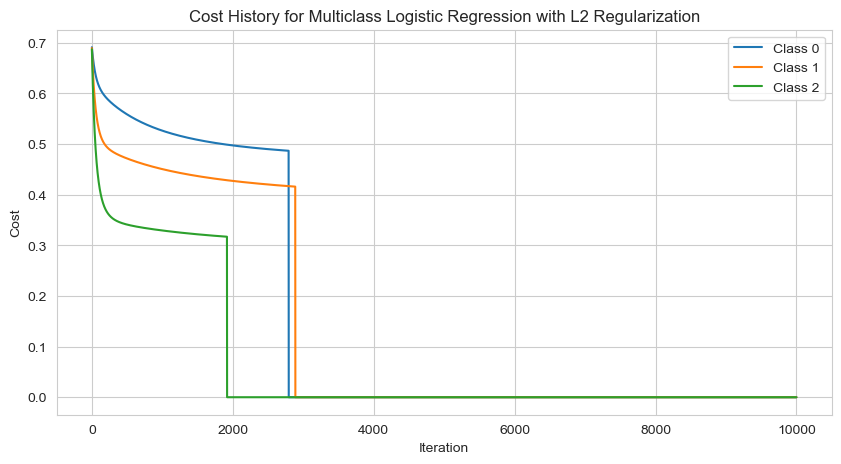

In [ ]:

# Initialize the weight parameters for each class
wt0_r = np.ones(x_train.shape[1])*0.0001
wt1_r = np.ones(x_train.shape[1])*0.0001
wt2_r = np.ones(x_train.shape[1])*0.0001

# Set the hyperparameters
alpha = 0.01
iteration = 10000
tol = 1e-5
Lambda =1.75

# Train the logistic regression models for all three classes
cost_history_r = [None]*3
wt0_r, cost_history_r[0] = gradient_descent_r(x_train, y_train0, wt0_r, alpha, iteration,tol, Lambda)
wt1_r, cost_history_r[1] = gradient_descent_r(x_train, y_train1, wt1_r, alpha, iteration,tol, Lambda)
wt2_r, cost_history_r[2] = gradient_descent_r(x_train, y_train2, wt2_r, alpha, iteration,tol, Lambda)

# Calculate the cost for the testing data
cost_test_r = [None]*3
cost_test_r[0] = cost_r(x_test, y_test0, wt0_r, Lambda)
cost_test_r[1] = cost_r(x_test, y_test1, wt1_r, Lambda)
cost_test_r[2] = cost_r(x_test, y_test2, wt2_r, Lambda)

# Plot the cost history for each class for both training and testing data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for i in range(3):
    plt.plot(range(iteration), cost_history_r[i], label=f"Class {i}")
#     plt.axhline(y=cost_test_r[i], linestyle='--', color=f"C{i}")
plt.legend()
plt.title("Cost History for Multiclass Logistic Regression with L2 Regularization")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [ ]:
# predictions on training set
y_pred_train0 = predict_binary(x_train, wt0_r)
y_pred_train1 = predict_binary(x_train, wt1_r)
y_pred_train2 = predict_binary(x_train, wt2_r)
# predictions on test set
y_pred_test0 = predict_binary(x_test, wt0_r)
y_pred_test1 = predict_binary(x_test, wt1_r)
y_pred_test2 = predict_binary(x_test, wt2_r)
print('Class 0 train and test accuracy:')
print(accuracy_score(y_train0, y_pred_train0))
print(accuracy_score(y_test0, y_pred_test0))
print('Class 1 train and test accuracy:')
print(accuracy_score(y_train1, y_pred_train1))
print(accuracy_score(y_test1, y_pred_test1))
print('Class 2 train and test accuracy:')
print(accuracy_score(y_train2, y_pred_train2))
print(accuracy_score(y_test2, y_pred_test2))


Class 0 train and test accuracy:
0.785
0.72
Class 1 train and test accuracy:
0.825
0.76
Class 2 train and test accuracy:
0.885
0.92


In [ ]:
y_pred_test1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
np.array(y_test1)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0], dtype=uint8)

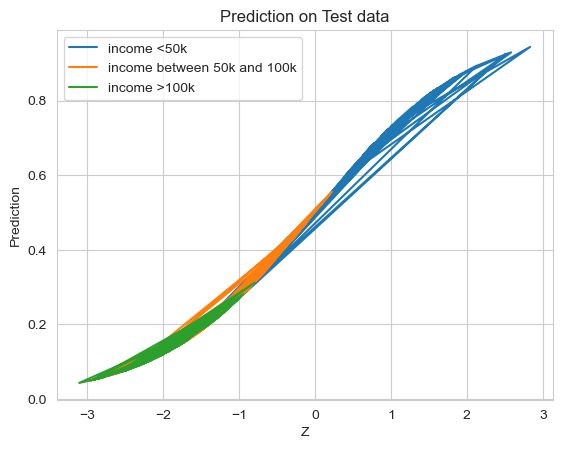

In [ ]:
# Predict on test data
y_hat0_test_r = sigmoid(x_test.dot(wt0_r))
y_hat1_test_r = sigmoid(x_test.dot(wt1_r))
y_hat2_test_r = sigmoid(x_test.dot(wt2_r))

# Activation Function Plots
 
plt.plot(x_test.dot(wt0_r),y_hat0_test_r, label='income <50k')


plt.plot(x_test.dot(wt1_r),y_hat1_test_r, label='income between 50k and 100k')


plt.plot(x_test.dot(wt2_r),y_hat2_test_r, label='income >100k')

# Add a title and labels for the x and y axes
plt.title('Prediction on Test data')
plt.xlabel('Z')
plt.ylabel('Prediction')

plt.legend()

plt.show()

Converged at iteration 3048
Converged at iteration 3213
Converged at iteration 2107
Converged at iteration 2912
Converged at iteration 3037
Converged at iteration 2007
Converged at iteration 2792
Converged at iteration 2885
Converged at iteration 1917
Converged at iteration 2685
Converged at iteration 2753
Converged at iteration 1836


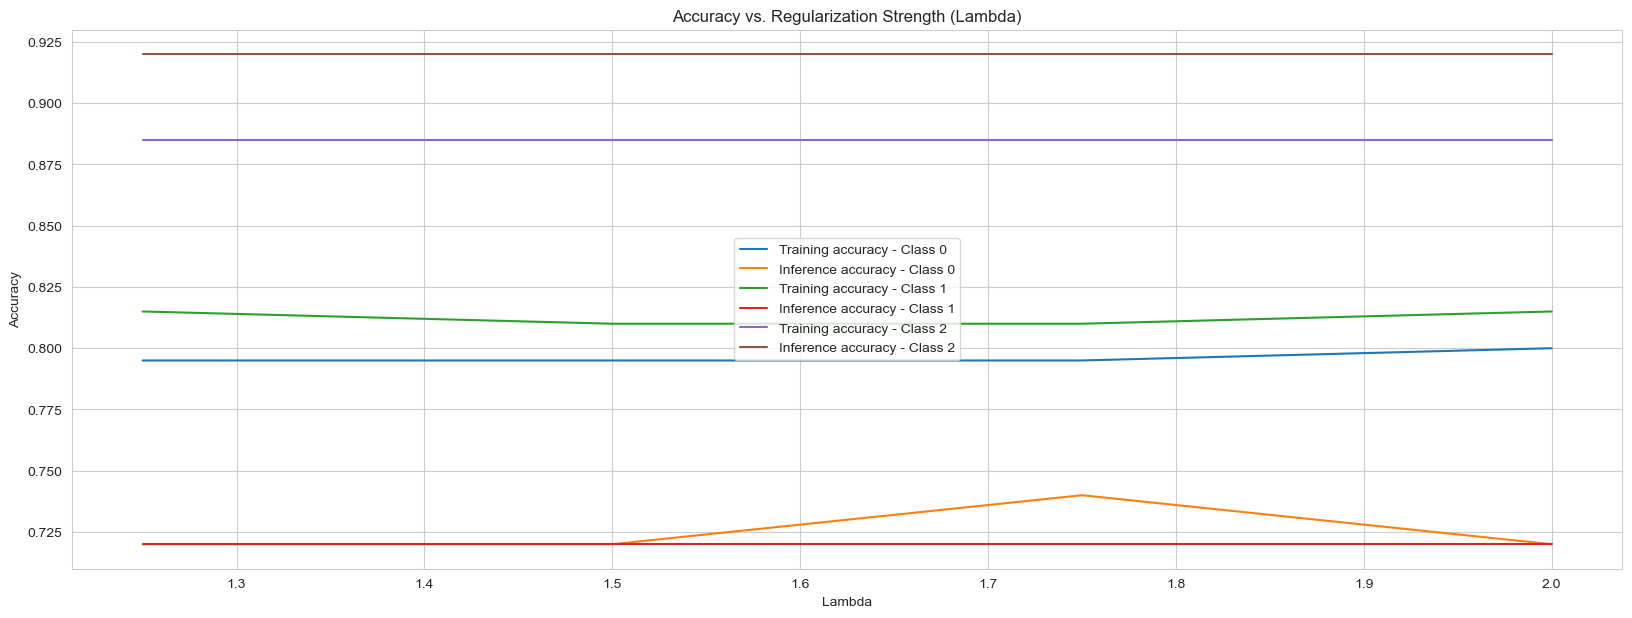

In [ ]:
import matplotlib.pyplot as plt

# Set up lists to store accuracy for each class
train_acc_class0 = []
train_acc_class1 = []
train_acc_class2 = []
test_acc_class0 = []
test_acc_class1 = []
test_acc_class2 = []
Lambda = [1.25,1.5,1.75,2]
for lam in Lambda:
    # Train the logistic regression models for all three classes
    wt0_r = np.zeros(x_train.shape[1])
    wt1_r = np.zeros(x_train.shape[1])
    wt2_r = np.zeros(x_train.shape[1])
    cost_history_r = [None]*3
    wt0_r, cost_history_r[0] = gradient_descent_r(x_train, y_train0, wt0_r, alpha, iteration,tol, lam)
    wt1_r, cost_history_r[1] = gradient_descent_r(x_train, y_train1, wt1_r, alpha, iteration,tol, lam)
    wt2_r, cost_history_r[2] = gradient_descent_r(x_train, y_train2, wt2_r, alpha, iteration,tol, lam)

    # Predict classes for training data
    y_train_pred0 = predict_binary(x_train, wt0_r)
    y_train_pred1 = predict_binary(x_train, wt1_r)
    y_train_pred2 = predict_binary(x_train, wt2_r)
    train_acc_class0.append(accuracy_score(y_train0, y_train_pred0))
    train_acc_class1.append(accuracy_score(y_train1, y_train_pred1))
    train_acc_class2.append(accuracy_score(y_train2, y_train_pred2))

    # Predict classes for testing data
    y_test_pred0 = predict_binary(x_test, wt0_r)
    y_test_pred1 = predict_binary(x_test, wt1_r)
    y_test_pred2 = predict_binary(x_test, wt2_r)
    test_acc_class0.append(accuracy_score(y_test0, y_test_pred0))
    test_acc_class1.append(accuracy_score(y_test1, y_test_pred1))
    test_acc_class2.append(accuracy_score(y_test2, y_test_pred2))

# Plot the accuracy vs. lambda for each class
plt.figure(figsize=(20,7))
plt.plot(Lambda, train_acc_class0, label='Training accuracy - Class 0')
plt.plot(Lambda, test_acc_class0, label='Inference accuracy - Class 0')
plt.plot(Lambda, train_acc_class1, label='Training accuracy - Class 1')
plt.plot(Lambda, test_acc_class1, label='Inference accuracy - Class 1')
plt.plot(Lambda, train_acc_class2, label='Training accuracy - Class 2')
plt.plot(Lambda, test_acc_class2, label='Inference accuracy - Class 2')
plt.legend()
plt.title('Accuracy vs. Regularization Strength (Lambda)')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
type[train_acc_class0]

type[[0.795, 0.8, 0.8]]

# Decision Tree

In [ ]:
features.head()

,Age,Final_Weight,Educational_Years,Capital_Gain,Capital_Loss,Hours_Per_Week,Federal-gov,Local-gov,Private,Self-emp-inc,...,India,Iran,Italy,Jamaica,Mexico,Philippines,Poland,Puerto-Rico,South,United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dx_train,dx_test,dy_train,dy_test = train_test_split(features,labels,test_size=0.2,random_state=42)

In [ ]:
# Define the decision tree algorithm function
def decision_tree(X_train, y_train, X_test, y_test,criteria,depth):
    
    # Create a decision tree model with max depth of 3
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(criterion=criteria,max_depth=depth)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict the classes for the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model on the test data
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    from sklearn import tree
    plt.figure(figsize = (15,10))
    tree.plot_tree(model, filled=True)
    return model, acc, y_pred

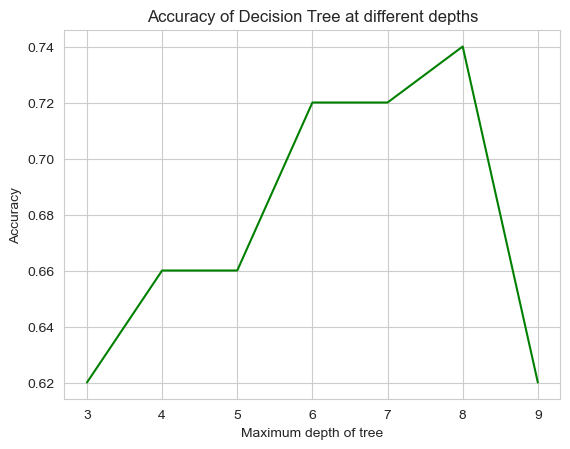

In [ ]:
depth1 =np.array([3,4,5,6,7,8,9])
acc1 = np.array([0.62,0.66,0.66,0.72,0.72,0.74,0.62])
plt.plot(depth1, acc1, color = 'g')
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree at different depths')
plt.show()

Accuracy : 0.7


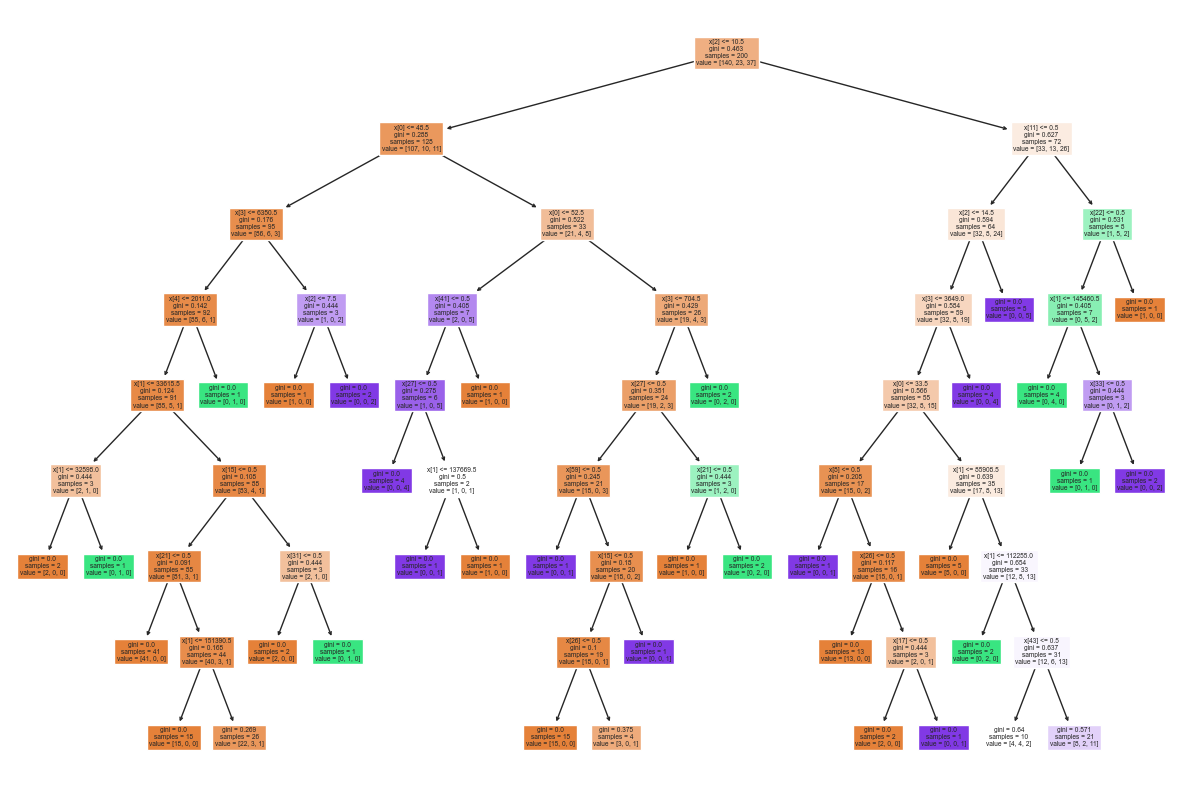

In [ ]:

model0, acc0, y0_pred = decision_tree(dx_train, dy_train, dx_test, dy_test,'gini',8)
print('Accuracy :', acc0)

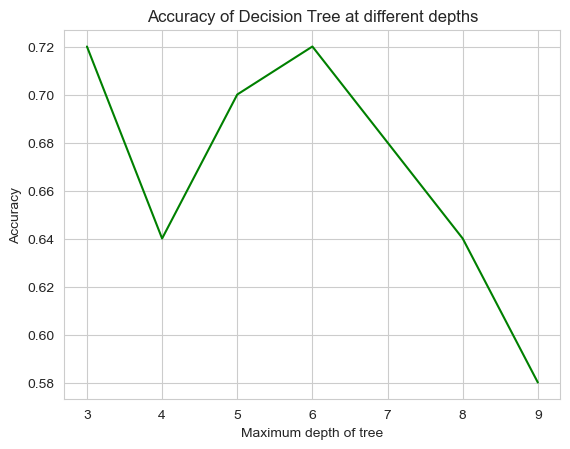

In [ ]:
depth2 =np.array([3,4,5,6,7,8,9])
acc2 = np.array([0.72, 0.64,0.7,0.72,0.68,0.64,0.58])
plt.plot(depth2, acc2, color = 'g')
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree at different depths')
plt.show()

Accuracy  0.58


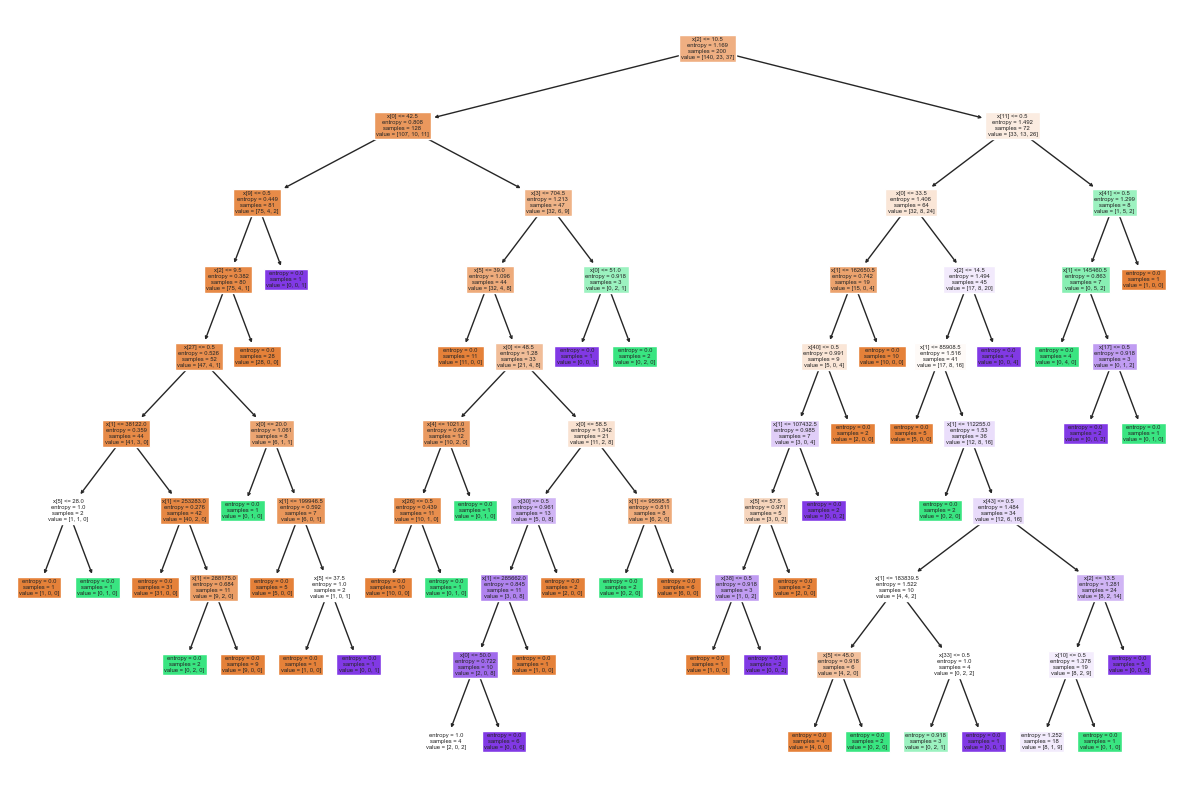

In [ ]:
model0, acc0, y0_pred = decision_tree(dx_train, dy_train, dx_test, dy_test,'entropy',9)
print('Accuracy ', acc0)

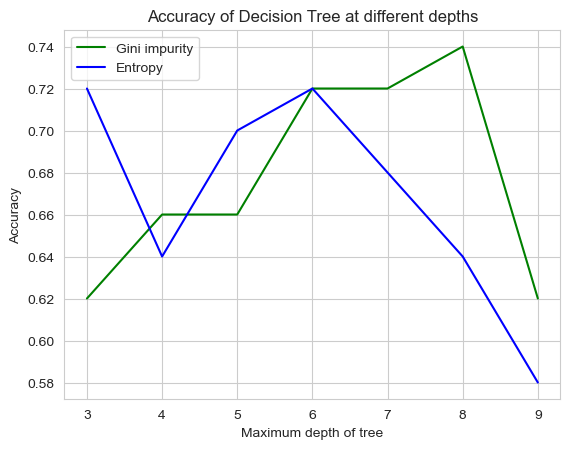

In [ ]:
depth1 =np.array([3,4,5,6,7,8,9])
acc1 = np.array([0.62,0.66,0.66,0.72,0.72,0.74,0.62])
plt.plot(depth1, acc1, color = 'g',label='Gini impurity')
depth2 =np.array([3,4,5,6,7,8,9])
acc2 = np.array([0.72, 0.64,0.7,0.72,0.68,0.64,0.58])
plt.plot(depth2, acc2, color = 'b',label='Entropy')
plt.legend()
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree at different depths')
plt.show()